## Project 1: Business Instagram Account Growth Model

Team members: Jackie Zeng and Cory Knox

How will a small start-up brand in the fashion-beauty cosmetics industry grow over the next few years on Instagram? Inspired by the new fashion brand, FadingFeelings.Co, that had launched just this July, we looked towards a variety of fashion/cosmetics brands that varied in size, luxury, and age, all on the social media platform Instagram. By tracking their follower growth since their social media launched, we were able to track the various patterns that seemed to follow corresponding with their business type. This then aided in the predictions for where FadingFeelings’s instagram would go in the years to come. 

The first challenge at hand was the decision of how the business types would be divided. We settled on three business brands to follow: 1. large , “commercial” brands such as H&M, Sephora, and MorpheBrushes, 2. Luxury, “Hype-Beast” brands such as Off White, Supreme, and Antisocial Social Club, and 3. Small start-ups that have recently come to the social media scene such as EggieShop, Lunar Beauty, and Raw Spirit Fragrances. All represent a different side of business development and the paths in which FadingFeelings could take. 

Next was data collection from these nine different brands. By graphing the follower count of the brand compared to a specific time division, we obtained a visual that could then be observed for further analysis. Once the visuals were made, we noticed a trend within the individual divisions. For the larger, commercial brands, all seemed to follow a linear growth model, with steady increase in followers. As for the luxury brands that follow the “Hype-Beast”, street wear culture, an exponential line of growth seemed to follow, indicating that follower growth took on an extreme over time. Finally for the smaller brands new to the social media scene, a logarithmic pattern is obviously seen. As they are new to the industry it is expected to see extreme spikes in follower growth since launch.

The final challenge and decision that we had to make was in reference to the time frame. From the year 2018 to the present, Instagram instigated a company-business confidentiality rule allowing businesses the option to not share their follower growth to the public. This led to challenges in our research and an observable time cut off at this year, especially seen in the smaller, recent start up graphs. Our follower information was unobservable by physical number since the cut off. This led to our decision to vary the time frames within each group. As for the smaller, start-up companies, we settled on since their launch to their cut-off, trying to obtain as much of a visual data collection as possible. For the larger companies that followed a commercial outlook and linear pattern, one year seemed to be an understandable time frame, capturing the linear growth that was needed. Finally for our luxury brands with exponential growth, we settled on a two year frame, long enough to capture the full exponential pattern mentioned previously. Mind you the companies all began with different levels of popularity before their Instagrams launched, some being already well established businesses amongst the public, some being unknown completely without any following. Although the time frames differ, the popularity growth patterns were established and seen clearly. 



In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import numpy
import csv
import pandas as pd
import math

### Reading the data

In [2]:
df = pd.read_csv('clean_data_trimmed.csv')

print("Column headings:")
print(df.columns)

#print (df['HM']) #prints entire data set

Column headings:
Index(['Morphebrushes', 'HM', 'Sephora', 'Unnamed: 3', 'ASSC', 'OffWhite',
       'Supreme', 'Unnamed: 7', 'Eggie', 'LB', 'RSF'],
      dtype='object')


### Setting up the big companies systems

In [3]:
# System stuff: HM = df['HM'].iloc[0], Sephora = df['Sephora'].iloc[0]
Morphe = System(f_0 = df['Morphebrushes'].iloc[0], t_0 = 0, t_end = 11, GR = 0.20) #gets the initial followers count of the big companies.
HM = System(f_0 = df['HM'].iloc[0], t_0 = 0, t_end = 11, GR = 0.14)
Sephora = System(f_0 = df['Sephora'].iloc[0], t_0 = 0, t_end = 11, GR = 0.130)

Morphe #prints values to check if it's correct

f_0      751007.0
t_0           0.0
t_end        11.0
GR            0.2
dtype: float64

### Plot function and first run simulation function

In [4]:
def plot_results(name, t_0, t_end, timeseries, title, shift):
    x = linrange(t_0, t_end, 1, endpoint=True)
    units = ""
    
    if (df[name].iloc[0]>1e6): #convert to in terms of millions
        y = df[name]/1e6
        timeseries = timeseries/1e6
        units = " (millions)"
    elif (df[name].iloc[0]>1e3): #convert to in terms of thousands
        y = df[name]/1e3
        timeseries = timeseries/1e3        
        units = " (thousands)"
    else:
        y = df[name]
        
    #shifts the model plot up or down to better match the data. 
    timeseries += shift

    #labeling allows easier differentiation between model and collected data graphs
    plot(x, y,  color='C4', label='SocialBlade')
    plot(timeseries, '--', color='C1', label='Model')
    
    y_label = 'Numbers of Followers' + units 
    decorate(xlabel='Months',
         ylabel = y_label,
         title=title)

### Simulating big companies

In [5]:
def run_simulation(system):
    results = TimeSeries()
    results[system.t_0] = system.f_0
    for t in linrange(system.t_0, system.t_end):
        #f_gain = system.GR * results[t] #this tests Continuous differential growth. It turns out this doesn't fit our model very well. 
        f_gain = system.GR * results[0] #discrete constant type that works
        results[t+1] = results[t] + f_gain
    return results

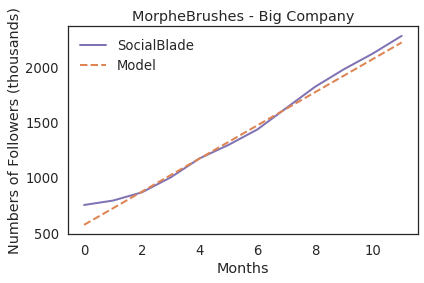

In [6]:
#Morphe
results = run_simulation(Morphe)
plot_results('Morphebrushes', 0, 23, results, "MorpheBrushes - Big Company", -180)
print ()

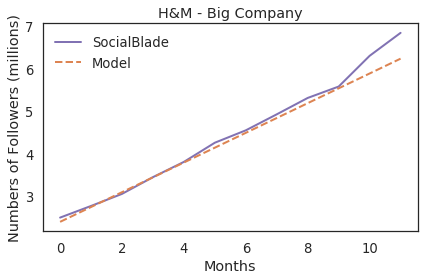

In [7]:
#H&M
results = run_simulation(HM)
plot_results('HM', 0, 23, results, "H&M - Big Company", -0.1)

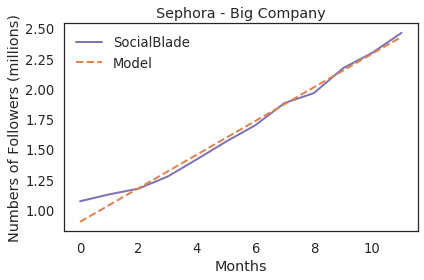

In [8]:
#Sephora
results = run_simulation(Sephora)
plot_results('Sephora', 0, 23, results, "Sephora - Big Company",-0.17)

### Simulating luxury brands

In [9]:
#this version of run simulation uses an exponential growth model
def run_simulation_2(system):
    results = TimeSeries()
    results[system.t_0] = system.f_0
    for t in linrange(system.t_0, system.t_end):
        #exponential growth model:
        f_gain = system.coef*exp(system.GR * t) 
        results[t+1] = results[t] + f_gain
    return results

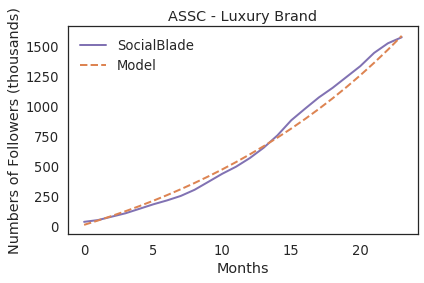

In [10]:
ASSC = System(f_0 = df['ASSC'].iloc[0], t_0 = 0, t_end = 23, GR = 0.053, coef = df['ASSC'].iloc[0])
results = run_simulation_2(ASSC)
plot_results('ASSC', 0, 23, results, "ASSC - Luxury Brand", -25)

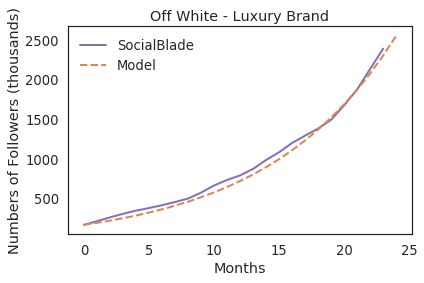

In [11]:
OffWhite = System(f_0 = df['OffWhite'].iloc[0], t_0 = 0, t_end = 24, GR = 0.10, coef = 25000)
results = run_simulation_2(OffWhite)
plot_results('OffWhite', 0, 23, results, "Off White - Luxury Brand", 0)

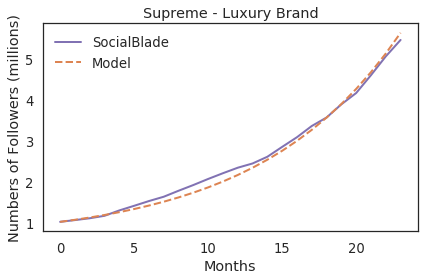

In [12]:
Supreme = System(f_0 = df['Supreme'].iloc[0], t_0 = 0, t_end = 23, GR = 0.105, coef = 50000)
results = run_simulation_2(Supreme)
plot_results('Supreme', 0, 23, results, "Supreme - Luxury Brand", 0)

### Simulating small startups

For smaller startups, we decided to model its growth with a logarithmic curve. This phemonomon is largely because most of these startups are created by influencers and youtubers with a significant following. Hence, we can often observe a boom of follows increase in the beginning stages.

[44278.06684523 13535.91250717]
The equation of this curve is: y =  44278.06684523 * log(x) + 13535.91250717


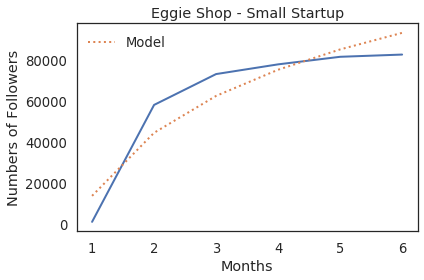

In [13]:
#Eggie data
EggieX = linrange(1, 24, 1, endpoint=True)
EggieY = df['Eggie']
plot (EggieX, EggieY,  '-', color='C0')

#Eggie modeling using numpy

#creates array with Eggie's dataset:
y = numpy.array(df['Eggie'][:6])
x = numpy.array(linrange(1, 7))

#polyfit creates the best fit log curve from a set of data
print (numpy.polyfit(numpy.log(x), y, 1)) 

#using the printed data, I graphed the model that fits the projections of EggieShop
y =  44278.06684523 * log(x) + 13535.91250717 
plot (x, y,':', color='C1', label='Model')

#equation of model
print ('The equation of this curve is: y =  44278.06684523 * log(x) + 13535.91250717')

#label graph
decorate(xlabel='Months', 
         ylabel='Numbers of Followers',
         title='Eggie Shop - Small Startup')

[21228.1239933  82037.98535263]
The equation of this curve is: y =  21228.1239933 * log(x) + 82037.98535263


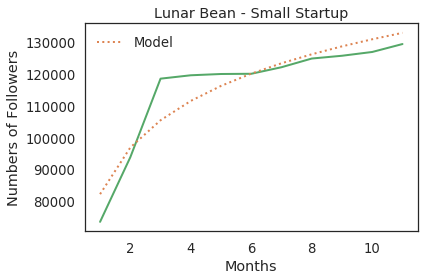

In [14]:
#LunarBean data
LBX = linrange(1, 24, 1, endpoint=True)
LBY = df['LB']
plot (LBX, LBY, color='C2')

y = numpy.array(df['LB'][:11])
x = numpy.array(linrange(1, 12))

print (numpy.polyfit(numpy.log(x), y, 1))

y =  21228.1239933 * log(x) + 82037.98535263
plot (x, y, ':', color='C1', label='Model')

print ('The equation of this curve is: y =  21228.1239933 * log(x) + 82037.98535263')

decorate(xlabel='Months', 
         ylabel='Numbers of Followers',
         title='Lunar Bean - Small Startup')

[ 973.31881964 5194.89738788]
The equation of this curve is: y = 973.31881964 * log(x) + 5194.89738788


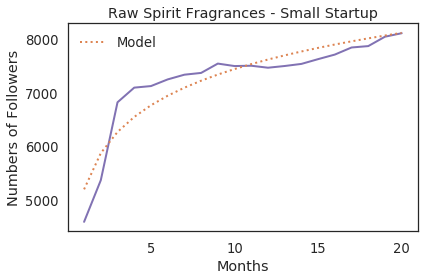

In [15]:
#RawSpiritFragrances data
RSFX = linrange(1, 24, 1, endpoint=True)
RSFY = df['RSF']
plot (RSFX, RSFY, color='C4')

y = numpy.array(df['RSF'][:20])
x = numpy.array(linrange(1, 21))

print (numpy.polyfit(numpy.log(x), y, 1))

y =  973.31881964 * log(x) + 5194.89738788
plot (x, y, ':', color='C1', label='Model')

print ('The equation of this curve is: y = 973.31881964 * log(x) + 5194.89738788')

decorate(xlabel='Months', 
         ylabel='Numbers of Followers',
         title='Raw Spirit Fragrances - Small Startup')

## Conclusion

Depending on where FadingFeelings.Co goes in the years to come and how they decide to establish their brand, the growth pattern that they may follow when in discussion of social media presence and followers can vary. They may take on an exponential growth pattern similar to that of the luxury brands if they were to be accompanied by a celebrity support, higher market price, and were to shift their social media audience to that similar to the other Hype-Beast brands. They may go towards a linear fit if they were to shift to a more commercial image, lowering prices and increasing product, representing a louder, broader, more flexible audience than that of a higher-market group. If FadingFeelings.Co continues to follow the predicted behavior, we can assume that within the next few months, it will begin to imitate the log graphs seen with the smaller businesses. From there it may go to exponential growth or linear or another completely different option, while this is also assuming that FadingFeelings.Co and the other brands remains financially stable and continues to have the resources needed to grow in such a way. Unfortunately there is only so much data that we have collected and related back to the topic at hand given our time. If we were to dig into a deeper analysis, we would follow FadingFeelings.Co along with the nine other companies over a longer time frame from launch to present day and then some. We would also increase the company numbers we were to analyze, as well as bringing in other business models, small boutiques, privately owned beauty companies, etc. The flaw in our model was the variety and lack of. If we wanted to come closer to the “perfect model” we would want to broaden our horizons. But the model at hand is a good beginning showing some general growth patterns businesses experience on Instagram.